In [603]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

#### Load and inspect the dataframe

In [604]:
uber_data = pd.read_csv("Uber Request Data.csv")

In [605]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [606]:
# Inspect the dataframe
#Check the Shape and Dimensions of the dataframe
print(uber_data.shape)
print(uber_data.ndim)

#Check the columns and their datatypes within the dataframe
print(uber_data.dtypes)

#Check the basic statistics of the columns in the dataframe
print(uber_data.describe())


(6745, 6)
2
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [607]:
# Convert the date columns to timestamp format
uber_data["Request timestamp"] = pd.to_datetime(uber_data["Request timestamp"])
uber_data["Drop timestamp"] = pd.to_datetime(uber_data["Drop timestamp"])

In [608]:
uber_data.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [609]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [610]:
uber_data["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [611]:
# Check missing values in the data
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

We observe that there are 2650 rows with no driver id's. This count of rows are in line with the number of rows where the Status is "No cars Available". In total, there are 3914 rows where we don't have any value for the "Drop timestamp" column. On analyzing the missing values in the "Status" column, we observe that there are exactly 3914 rows where the trip is **not completed** ( 2650 no cars available + 1264 cancelled). Hence the missing values in the data is as per the context of the business and no missing value treatment is required 

In [612]:
# Calculate the count of distinct values in each column to identify the primary key in the dataset
print(uber_data["Request id"].nunique())
print(uber_data["Pickup point"].nunique())
print(uber_data["Driver id"].nunique())
print(uber_data["Status"].nunique())
print(uber_data["Request timestamp"].nunique())
print(uber_data["Drop timestamp"].nunique())

6745
2
300
3
5618
2598


Since the number of distinct vales in the Request id column are equal to the total rows in the dataset, that column alone can be treated as the primary key of the dataset

In [613]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


Now that we have inspected the dataset, identified what each column represents and the primary key of the table, let's go ahead with the problem statement and further analyze the dataset

#### Exploratory Data Analysis

Create a new column for hour of cab request and hour od cab drop

In [614]:
# New column for Request Hour
uber_data["Request Hour"] = uber_data["Request timestamp"].dt.hour

Create a new column for the duration of the cab journey

In [615]:
uber_data.loc[uber_data["Status"]=="Trip Completed", "Journey Duration"] = uber_data['Drop timestamp'] - uber_data["Request timestamp"]

In [616]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31


Perform **univariate analysis** on the Journey Duration column to identify that there are no outliers in that column

0.0    1889
1.0     942
Name: hours, dtype: int64


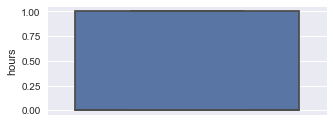

In [617]:
plt.figure(figsize=(5, 2))
print(uber_data["Journey Duration"].dt.components['hours'].value_counts())
sns.boxplot(y=uber_data["Journey Duration"].dt.components['hours'])


Looking at the box plot analysis above, we observe that all the cab journeys completed between 0 to 2 hours, hence there are no anomalies in the data

Perform **univariate analysis** to observe the frequency of cab requests that get completed, cancelled, or unavailable cabs

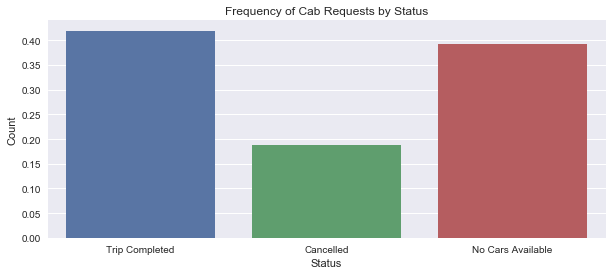

In [618]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Status',y= "Request id", estimator=lambda x: len(x)/len(uber_data), data=uber_data, ci=None)
plt.title("Frequency of Cab Requests by Status")
plt.ylabel("Count")
plt.show()

In [619]:
uber_data["Status"].value_counts(normalize=True)*100

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

We observe that approximately 60% of trip requests get either cancelled or fail because of no available cabs

Now that we have identified the pressing proble, let's take a look at what pickup point/journey is observing the largest issue

In [620]:
uber_data.groupby(["Pickup point", "Status"])["Request id"].nunique()/len(uber_data)*100

Pickup point  Status           
Airport       Cancelled             2.935508
              No Cars Available    25.396590
              Trip Completed       19.673832
City          Cancelled            15.804299
              No Cars Available    13.891772
              Trip Completed       22.297999
Name: Request id, dtype: float64

Perform **univariate analysis** to observe the frequency of cab requests across each hour of day

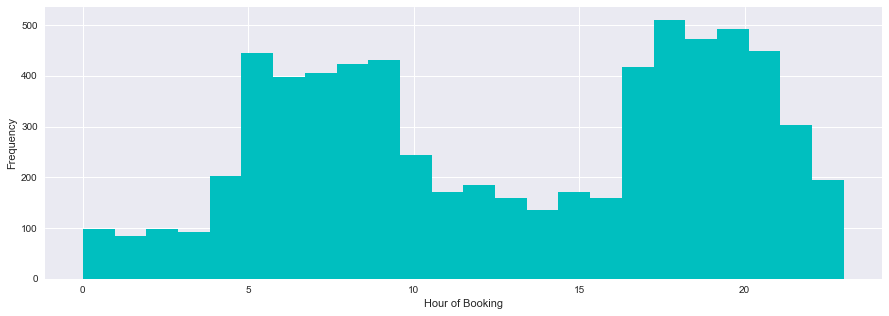

In [621]:
plt.figure(figsize=(15, 5))
plt.hist(uber_data["Request Hour"], color='c', bins=24)
plt.xlabel("Hour of Booking")
plt.ylabel("Frequency")
plt.show()

From the above plot, we can deduce that majority of the bookings were made from 5am - 9am in the mornings and 5pm - 10 pm in the evenings

To get a better understanding of what timeslots during the entire day generate the most number of bookings, we can bucket the reuqest hours as follows: <br>
- Mid-Night: 0-4 hrs<br>
- Early Morning: 5-9 hrs<br>
- Late Morning: 10-12 hrs<br>
- Afternoon: 13-16 hrs<br>
- Evening: 17-20 hrs<br>
- Night: 20-23 hrs<br>

In [622]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31


In [623]:
uber_data.loc[(uber_data["Request Hour"]>=0) & (uber_data["Request Hour"]<=4), "Timeslot"] = "Mid-Night"
uber_data.loc[(uber_data["Request Hour"]>=5) & (uber_data["Request Hour"]<=9), "Timeslot"] = "Early Morning"
uber_data.loc[(uber_data["Request Hour"]>=10) & (uber_data["Request Hour"]<=12), "Timeslot"] = "Late Morning"
uber_data.loc[(uber_data["Request Hour"]>=13) & (uber_data["Request Hour"]<=16), "Timeslot"] = "Afternoon"
uber_data.loc[(uber_data["Request Hour"]>=17) & (uber_data["Request Hour"]<=20), "Timeslot"] = "Evening"
uber_data.loc[(uber_data["Request Hour"]>=21) & (uber_data["Request Hour"]<=24), "Timeslot"] = "Night"


In [624]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00,Late Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning


Observe the distribution of the frequency of bookings within each of the timeslots

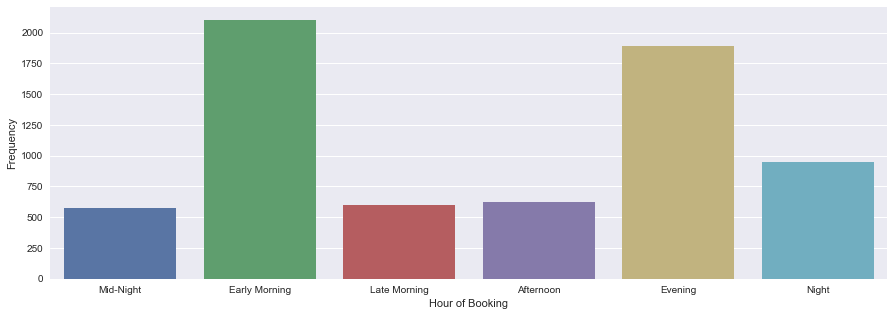

In [625]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Timeslot',y= "Request id", estimator=lambda x: len(x), data=uber_data, ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.xlabel("Hour of Booking")
plt.ylabel("Frequency")
plt.show()

From the above plot, we can deduce that majority of the bookings were made during _Early Morning_ and _Evening_

To get a better understanding on request hours, perform **Bivariate analysis** to identify the distribution Hour of Bookings across pickup locations

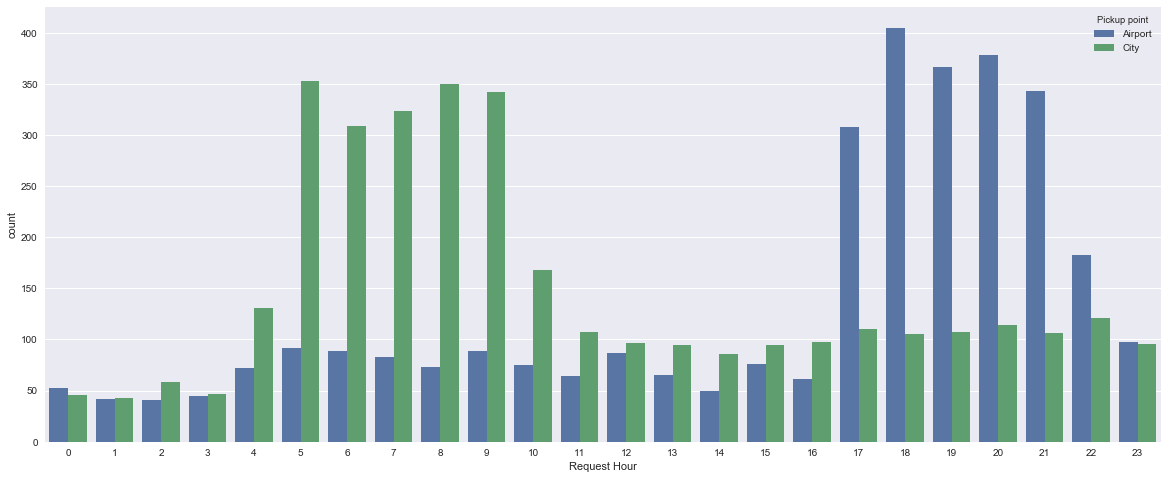

In [626]:
# specify hue="categorical_variable"
plt.figure(figsize=(20, 8))
sns.countplot(x='Request Hour', hue="Pickup point", data=uber_data)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()


When breaking the request hour frequency by different pickup locations, we get a really interesting piece of insight! <br>
_Majority of demand for the pickups from City is in the mornings between 5am - 10am and majority of demand for the pickups from Airport is in the evenings between 5pm - 11pm_

On performing the same analysis above in the bucketed timeslots:

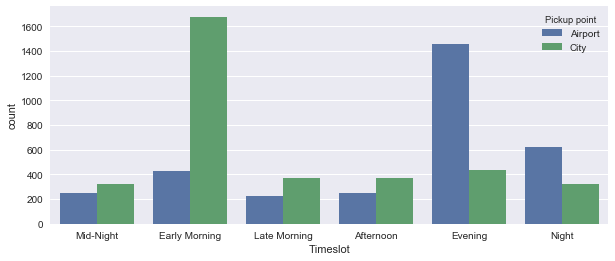

In [627]:
# specify hue="categorical_variable"
plt.figure(figsize=(10, 4))
sns.countplot(x='Timeslot', hue="Pickup point", data=uber_data, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

Majority of the bookings from Airport - City happen in the evenings, and majority of the bookings from City - Airport happen during Early Mornings

Next, let's try addressing the major problem that Uber seems to be facing - the problem of trips getting cancelled or no cabls available, as both of these cases are costing Uber

Frequency of requests that get 'cancelled' or show 'no cabs available'

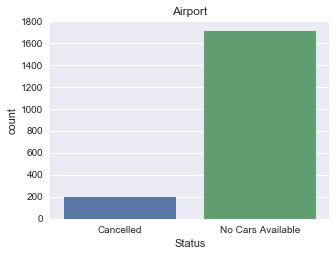

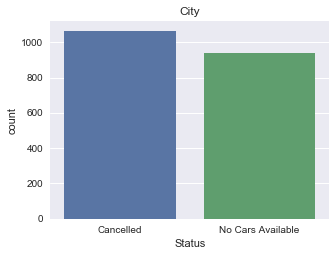

In [628]:
uber_data_not_completed = uber_data.loc[uber_data["Status"]!="Trip Completed"]

plt.figure(figsize=(5, 8))
plt.subplot(2,1,1)
sns.countplot(x='Status', data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]=="Airport"])
plt.title("Airport")
plt.show()

plt.figure(figsize=(5, 8))
plt.subplot(2,1,2)
sns.countplot(x='Status', data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]!="Airport"])
plt.title("City")
plt.show()

From the above charts and analysis, we can observe that the major issue with pickups at the Airport is unavailability of cabs <br>
For the city, the issues with pickups is almost equally likely due to drivers cancelling the cab or there are no cabs available

Let's look at the above data at an hourly level across the day - **multivariate analysis** (considering 3 variables: status, pickup point, request hour)

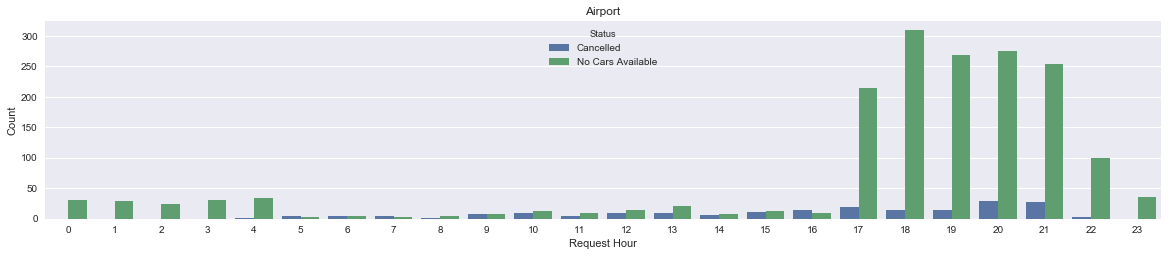

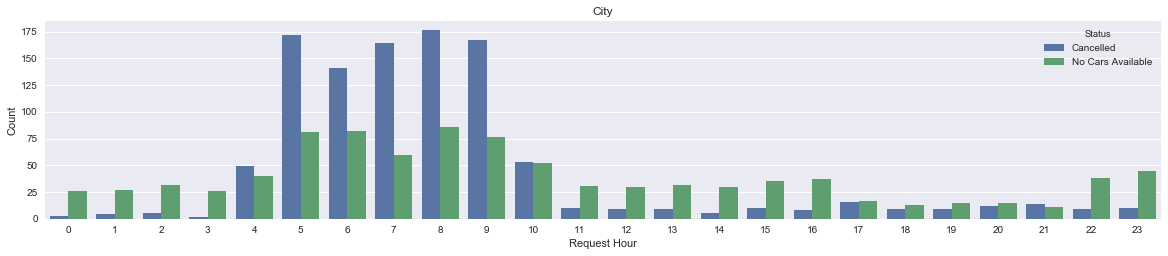

In [629]:
uber_data_not_completed = uber_data.loc[uber_data["Status"]!="Trip Completed"]

plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='Request Hour',y= "Request id", hue = "Status", estimator=lambda x: len(x), data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]=="Airport"], ci=None)
plt.title("Airport")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x='Request Hour',y= "Request id", hue = "Status", estimator=lambda x: len(x), data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]!="Airport"], ci=None)
plt.ylabel("Count")
plt.title("City")
plt.show()

From the above plots, it is evident that the most problematic timeslots for requests is: <br>
    Evening 5pm-11pm: mainly because of unavailability of cabs in the airport <br>
    Morning 5am-10am: mainly because of drivers cancelling cab pickups from the City

We can perform the above analysis at the bucketed timeslot level to derive the insight for the problematic timeslots:

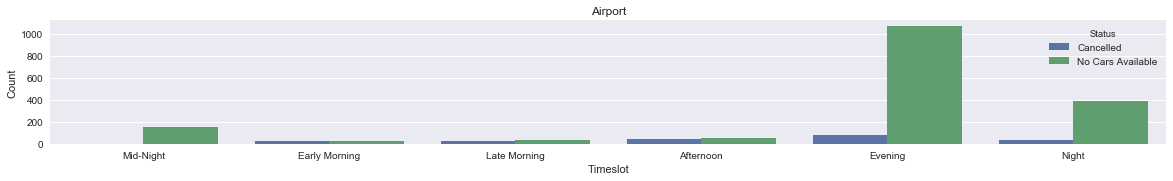

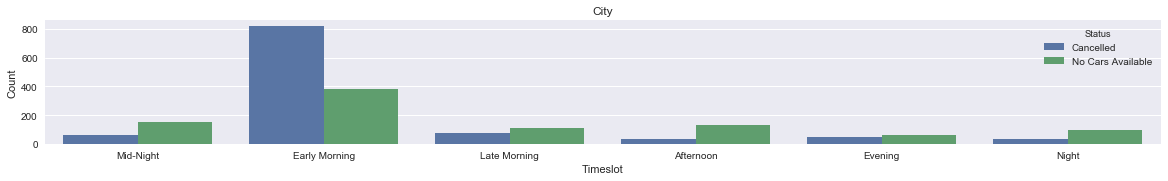

In [630]:
uber_data_not_completed = uber_data.loc[uber_data["Status"]!="Trip Completed"]

plt.figure(figsize=(20, 5))
plt.subplot(2,1,1)
sns.barplot(x='Timeslot',y= "Request id", hue = "Status", estimator=lambda x: len(x), data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]=="Airport"], ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.title("Airport")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.barplot(x='Timeslot',y= "Request id", hue = "Status", estimator=lambda x: len(x), data=uber_data_not_completed.loc[uber_data_not_completed["Pickup point"]!="Airport"], ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.ylabel("Count")
plt.title("City")
plt.show()

From the above plots, it is evident that the most problematic timeslots for requests is: <br>
    Evenings: mainly because of unavailability of cabs in the airport <br>
    Early Mornings: mainly because of drivers cancelling cab pickups from the City

#### Identifying the Gap between Supply and Demand

The gap between supply and demand basically refers to the gap that exists in terms of how many cabs are requested by users and the number of cabs that are actually available at any point of time. Based on our data, we can consider the trips where status was "Trip Completed" as data where the demand was met by the supply. In case where the status was "Cancelled" or "No cars available", this is where demand exceeds supply

In [631]:
# Creat a new dataframe uber_data_v2 - we will now work on this dataset for the analysis ahead
uber_data_v2 = uber_data
uber_data_v2.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00,Late Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning


In [632]:
# Add a new column as supply (if Trip is completed, then supply is 1)
uber_data_v2.loc[uber_data_v2["Status"]=="Trip Completed", "Supply"] = 1
uber_data_v2.loc[uber_data_v2["Status"]!="Trip Completed", "Supply"] = 0

# Add a new column as demand (demand is 1 for every row in the dataframe)
uber_data_v2["Demand"] = 1

# Add a new column D_S_Gap (demand - supply)
uber_data_v2["D_S_Gap"] = uber_data_v2["Demand"] - uber_data_v2["Supply"]

In [633]:
uber_data_v2["Supply"].value_counts()

0.0    3914
1.0    2831
Name: Supply, dtype: int64

In [634]:
uber_data_v2.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot,Supply,Demand,D_S_Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00,Late Morning,1.0,1,0.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00,Evening,1.0,1,0.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00,Early Morning,1.0,1,0.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00,Night,1.0,1,0.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning,1.0,1,0.0


At an hourly level, plot the demand, supply and the supply gap (demand - supply)

In [635]:
demand_supply_gap = pd.melt(frame=uber_data_v2[["Pickup point", "Request Hour", "Supply", "Demand", "D_S_Gap"]], id_vars=["Pickup point", "Request Hour"])
demand_supply_gap.head()

,Pickup point,Request Hour,variable,value
0,Airport,11,Supply,1.0
1,Airport,17,Supply,1.0
2,City,9,Supply,1.0
3,Airport,21,Supply,1.0
4,City,8,Supply,1.0


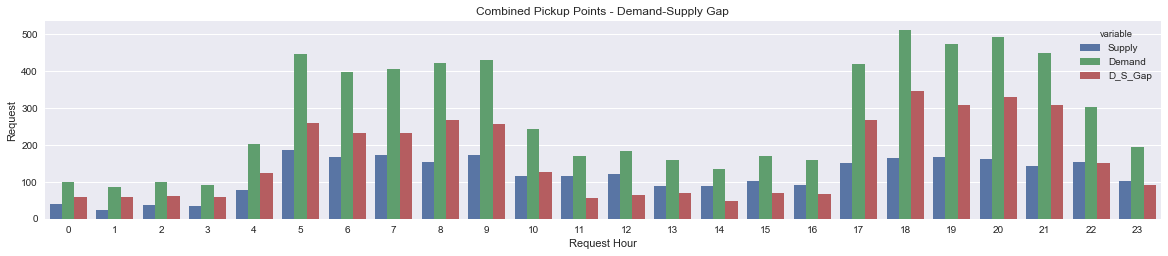

In [636]:
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='Request Hour',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap, ci=None)
plt.title("Combined Pickup Points - Demand-Supply Gap")
plt.ylabel("Request")
plt.show()

As can be observed from the above plot, the greatest demand-supply gap over the period of the day exists between 5am - 9am in the morning and between 5pm - 10 pm in the evening <br><br>
In order to figure out what may be causing these 2 timeslots to peak in terms of demand-supply gap, let's breake down the above analysis by the differnt Pickup Types


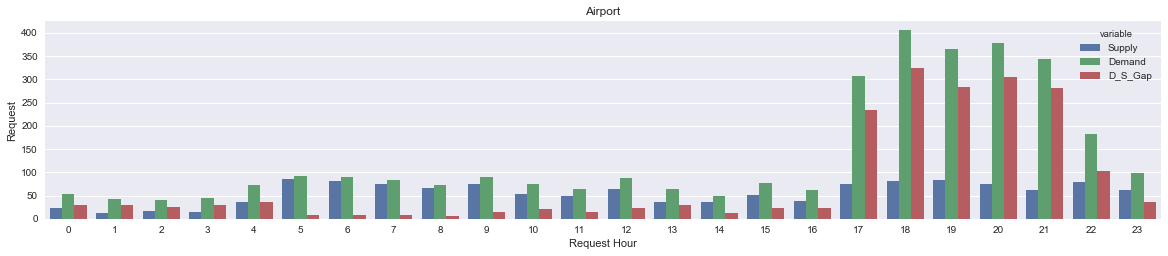

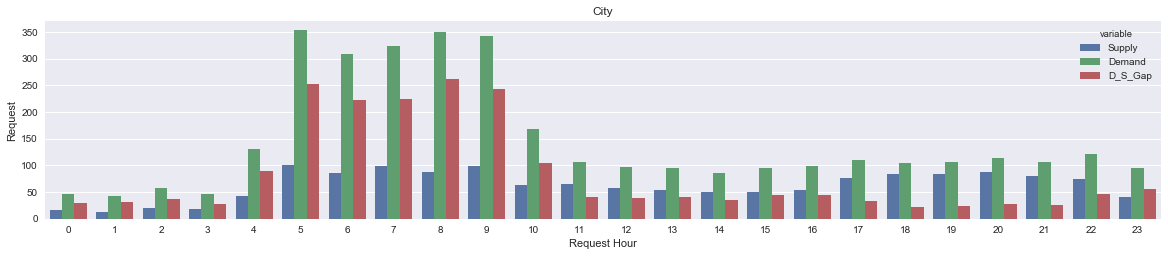

In [637]:
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='Request Hour',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap.loc[demand_supply_gap["Pickup point"]=="Airport"], ci=None)
plt.title("Airport")
plt.ylabel("Request")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x='Request Hour',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap.loc[demand_supply_gap["Pickup point"]!="Airport"], ci=None)
plt.ylabel("Request")
plt.title("City")
plt.show()

To get a better understanding of what **timeslot** in the day does the maximum gap in supply and demand for cabs exists, performing the above analysis at a timeslot will give a better indication

In [638]:
uber_data_v2.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot,Supply,Demand,D_S_Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,01:09:00,Late Morning,1.0,1,0.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,00:50:00,Evening,1.0,1,0.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,00:41:00,Early Morning,1.0,1,0.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,00:55:00,Night,1.0,1,0.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning,1.0,1,0.0


In [639]:
demand_supply_gap = pd.melt(frame=uber_data_v2[["Pickup point", "Timeslot", "Supply", "Demand", "D_S_Gap"]], id_vars=["Pickup point", "Timeslot"])
demand_supply_gap.head()

,Pickup point,Timeslot,variable,value
0,Airport,Late Morning,Supply,1.0
1,Airport,Evening,Supply,1.0
2,City,Early Morning,Supply,1.0
3,Airport,Night,Supply,1.0
4,City,Early Morning,Supply,1.0


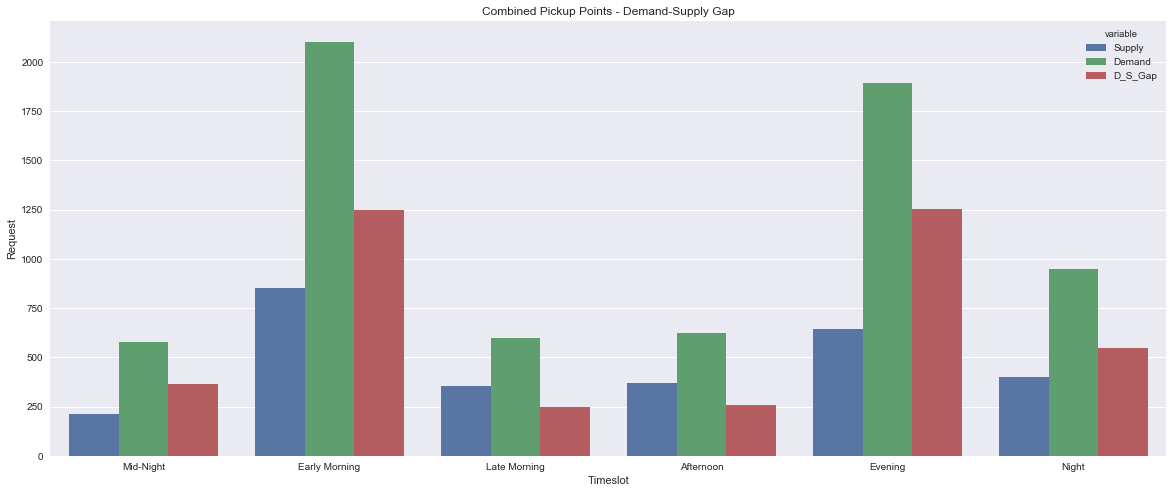

In [640]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Timeslot',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap, ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.title("Combined Pickup Points - Demand-Supply Gap")
plt.ylabel("Request")
plt.show()

As can be observed from the above plot, the greatest demand-supply gap over the period of the day exists during Early Mornings and Evenings <br><br>
In order to figure out what may be causing these 2 timeslots to peak in terms of demand-supply gap, let's breake down the above analysis by the differnt Pickup Types


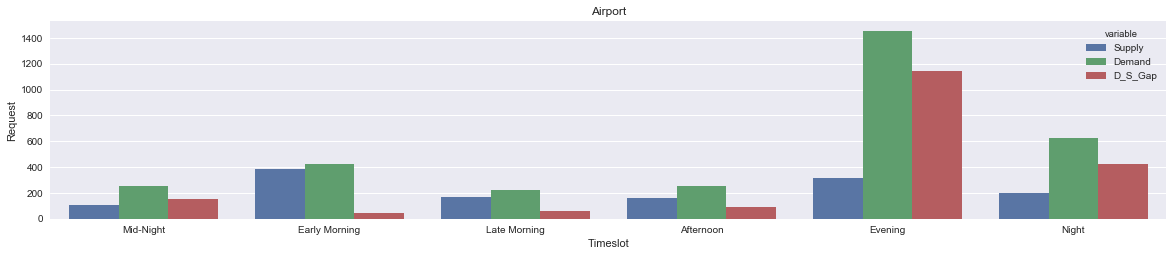

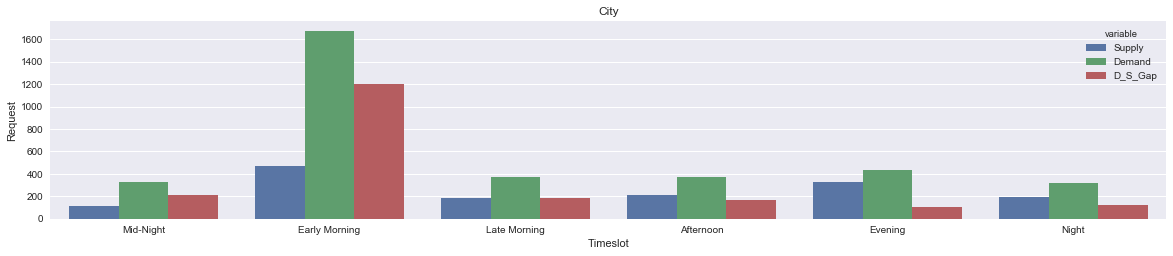

In [641]:
plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='Timeslot',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap.loc[demand_supply_gap["Pickup point"]=="Airport"], ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.title("Airport")
plt.ylabel("Request")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x='Timeslot',y= "value", hue = "variable", estimator=np.sum, data=demand_supply_gap.loc[demand_supply_gap["Pickup point"]!="Airport"], ci=None, order=["Mid-Night","Early Morning","Late Morning","Afternoon","Evening", "Night"])
plt.ylabel("Request")
plt.title("City")
plt.show()

In [642]:
ds_gap_airport = demand_supply_gap.loc[(demand_supply_gap["Pickup point"]=="Airport")&(demand_supply_gap["variable"]=="D_S_Gap"), ["Timeslot", "variable", "value"]]
ds_gap_city = demand_supply_gap.loc[(demand_supply_gap["Pickup point"]!="Airport")&(demand_supply_gap["variable"]=="D_S_Gap"), ["Timeslot", "variable", "value"]]

# Percent distribution of the supply-demand gap in the Airport
print(ds_gap_airport.groupby("Timeslot").sum().transform(lambda x: x/np.sum(x)*100))

# Percent distribution of the supply-demand gap in the City
print(ds_gap_city.groupby("Timeslot").sum().transform(lambda x: x/np.sum(x)*100))


                   value
Timeslot                
Afternoon       4.709576
Early Morning   2.302459
Evening        59.916274
Late Morning    3.192046
Mid-Night       7.849294
Night          22.030351
                   value
Timeslot                
Afternoon       8.287569
Early Morning  60.159760
Evening         5.292062
Late Morning    9.236146
Mid-Night      10.683974
Night           6.340489


Looking at the Supply-Demand gap analysis, we can observe that:<br>
   - The major gap in supply-demand for cabs from the Airport exists in the Evening (59.9% of the entire day's supply-demand gap in the Airport)
   - The major gap in supply-demand for cabs from the City exists in the Early Morning (60.2% of the entire day's supply-demand gap in the City)

#### Driver Wait time

Now that we have identified the timeslots where the demand-supply gap is the highest, let's move ahead and find out what the dsitribution of waiting times looks like for drivers in airports and in the city

In order to do this, we will consider only the data for drivers where Status is "Trip completed" or "Cancelled" as these are the 2 actions that involve the interference of the driver. Also, we are going to assume that for the Status type as "Cancelled", the driver has willingly cancelled the request and hence his wait time will start again from 0

In [643]:
uber_driver_waiting = uber_data.loc[uber_data["Status"]!="No Cars Available"]

In [644]:
# Now, order the data by driver id and Request timestamp in ascending order
uber_driver_waiting = uber_driver_waiting.sort_values(by = ["Driver id", "Request timestamp"])

In [645]:
uber_driver_waiting.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot,Supply,Demand,D_S_Gap
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,NaT,Early Morning,0.0,1,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning,1.0,1,0.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,00:31:31,Night,1.0,1,0.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,00:57:43,Early Morning,1.0,1,0.0
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,17,NaT,Evening,0.0,1,1.0


Now, we need to calculate the difference between the last "Drop timestamp" and the following "Request timestamp" for every driver individually - this will correspond to the wait times
In case the driver has cancelled the request, his last timestamp will be considered as the cancel request timestamp and the next time stamp will be the new request timestamp

In [646]:
# Replace all the cancelled Drop timestamps with request timemstamps
uber_driver_waiting.loc[uber_driver_waiting['Status'] == "Cancelled", 'Drop timestamp'] = uber_driver_waiting["Request timestamp"]

# One approach that we can take in order to acheive what's explained above is by shifting the drop timestamp down by a row
uber_driver_waiting['last_timestamp'] = uber_driver_waiting['Drop timestamp'].shift(1)

# Create a flag column for when the driver id changes
uber_driver_waiting['driver_check'] = uber_driver_waiting['Driver id'].shift() == uber_driver_waiting['Driver id']

# Calculate the wait time as the differenct between request timestamp and last_timestamp
uber_driver_waiting["wait_time"] = uber_driver_waiting["Request timestamp"] - uber_driver_waiting["last_timestamp"]

# Wherever we have a change in driver id, reset the wait_time
uber_driver_waiting.loc[uber_driver_waiting["driver_check"]==False, "wait_time"] = np.nan

In [647]:
uber_driver_waiting.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Journey Duration,Timeslot,Supply,Demand,D_S_Gap,last_timestamp,driver_check,wait_time
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,2016-07-13 06:08:41,6,NaT,Early Morning,0.0,1,1.0,NaT,False,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,Early Morning,1.0,1,0.0,2016-07-13 06:08:41,True,02:24:35
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,00:31:31,Night,1.0,1,0.0,2016-07-13 09:25:47,True,12:31:41
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,00:57:43,Early Morning,1.0,1,0.0,2016-07-13 22:28:59,True,07:46:33
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,2016-07-14 17:07:58,17,NaT,Evening,0.0,1,1.0,2016-07-14 07:13:15,True,09:54:43


In [648]:
# Check the distribution of wait times for Drivers in the different pickup point in terms of hours
uber_driver_waiting.loc[uber_driver_waiting["driver_check"] == True,"wait_time_hours"] = uber_driver_waiting.loc[uber_driver_waiting["driver_check"] == True,'wait_time'].dt.components['hours']

<function matplotlib.pyplot.show(*args, **kw)>

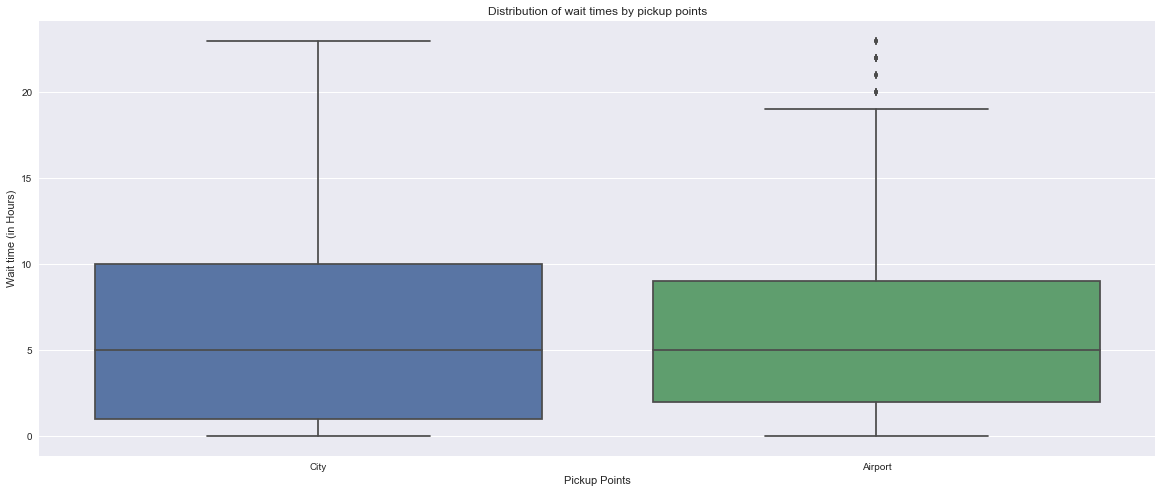

In [649]:
# Plot the distribution of the wait times accross the different pickup points
plt.figure(figsize=(20, 8))
sns.boxplot(x=uber_driver_waiting["Pickup point"], y=uber_driver_waiting["wait_time_hours"], data= uber_driver_waiting.loc[uber_driver_waiting["driver_check"] == True])
plt.ylabel("Wait time (in Hours)")
plt.xlabel("Pickup Points")
plt.title("Distribution of wait times by pickup points")
plt.show

The spread of wait times in the city is a lot more than the spread of wait times in the airport. <br>
The data above is a good indication of how many hours a driver has to wait in the Airport or in the city to get a request of a booking. Both the pickup points have a median wait time of 5 hours! <br><br>
However, we need to keep in mind that the data we have is only limited to those requests from the city to airport, and airport to city. If we were to consider all the bookings data, then you would expect the wait times in the city to be drastically lower than the wait times in the airport

Another way of going about the wait time analysis would be by only considering the rows where we have a driver going from city to airport (or vice versa), and then returning in the next request picked up by the driver

In [650]:
# Shift the Pickup point column 1 row down to allow for comparison between current pickpu point and next pickup point
uber_driver_waiting['prev_pickup'] = uber_driver_waiting['Pickup point'].shift(1)

In [651]:
uber_driver_waiting_refined = uber_driver_waiting.loc[(uber_driver_waiting["prev_pickup"]!=uber_driver_waiting["Pickup point"]) & (uber_driver_waiting["driver_check"] == True)]

<function matplotlib.pyplot.show(*args, **kw)>

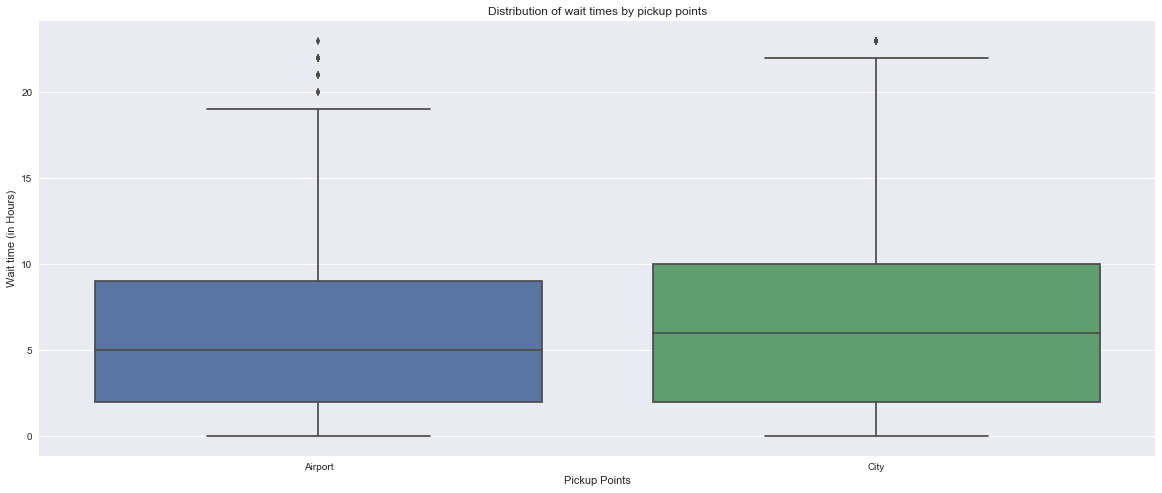

In [652]:
# Plot the distribution of the wait times accross the different pickup points
plt.figure(figsize=(20, 8))
sns.boxplot(x=uber_driver_waiting_refined["Pickup point"], y=uber_driver_waiting_refined["wait_time_hours"], data= uber_driver_waiting_refined)
plt.ylabel("Wait time (in Hours)")
plt.xlabel("Pickup Points")
plt.title("Distribution of wait times by pickup points")
plt.show

Just like the case when we considered the entire dataset, the spread of wait times in the city is a lot more than the spread of wait times in the airport. <br>
The median wait time in the Airport is slightly less than the City